初始loss: 83.94795227050781


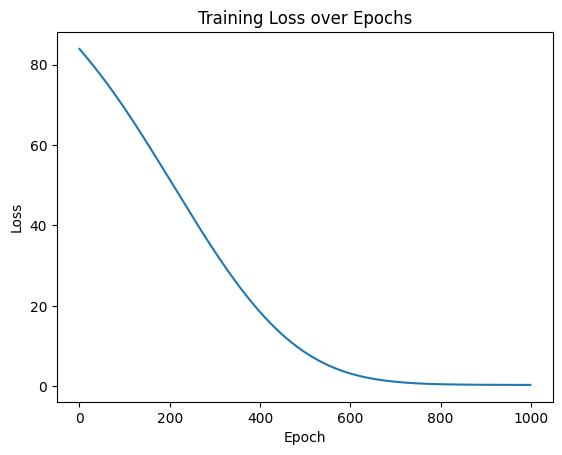

In [ ]:
# 使用pytorch构建神经网络

import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt


# 初始化数据集
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3], [7],  [11], [15]]

# 转为tensor
x = torch.tensor(x).float()
y = torch.tensor(y).float()

# 放到cuda进行运算
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = x.to(device)
y = y.to(device)

class MyNet(nn.Module):
    def __init__(self):
        # 调用super确保类继承nn.Module中预构建的函数
        super().__init__()
        # 定义网络层
        self.layer1 = nn.Linear(2, 8)  
        self.activation = nn.ReLU()  # 激活函数
        self.layer2 = nn.Linear(8, 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x
    
net = MyNet().to(device)
# print(net.layer1.weight)  # 查看第一层的权重

# 获取神经网络所有参数
# for param in net.parameters():
#     print(param)
    
    
# 定义损失函数
def loss_func(y_pred, y):
    f = nn.MSELoss()
    loss = f(y_pred, y)
    return loss

Y = net(x)
loss = loss_func(Y, y)
print("初始loss:", loss.item())
    
# 定义优化器
# opt = SGD(net.parameters(), lr=0.001)
opt = Adam(net.parameters(), lr=0.001)

losses = []
# 训练
for epoch in range(1000):
    opt.zero_grad()  # 梯度归零
    loss = loss_func(net(x), y)  # 计算损失
    loss.backward()  # 反向传播
    opt.step()  # 更新参数
    losses.append(loss.item())

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

    

神经网络数据的加载

batch_size是神经网络中重要的超参数，batch_size的大小指的是计算损失值或者更新权重时考虑的数据样本数。由于内存大小往往无法一次性将所有数据用于权重更新，因此选用批数据作为抽样样本以更新权重，然后计算更新后的损失值。

In [20]:
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn


x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3], [7], [11], [15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X = X.to(device)
Y = Y.to(device)

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
data = MyDataset(X, Y)
loader = DataLoader(data, batch_size=2, shuffle=True)
for x, y in loader:
    print(x, y)

tensor([[7., 8.],
        [1., 2.]], device='cuda:0') tensor([[15.],
        [ 3.]], device='cuda:0')
tensor([[3., 4.],
        [5., 6.]], device='cuda:0') tensor([[ 7.],
        [11.]], device='cuda:0')


综上所述，我们可以完成一个Pytorch框架的基础网络了

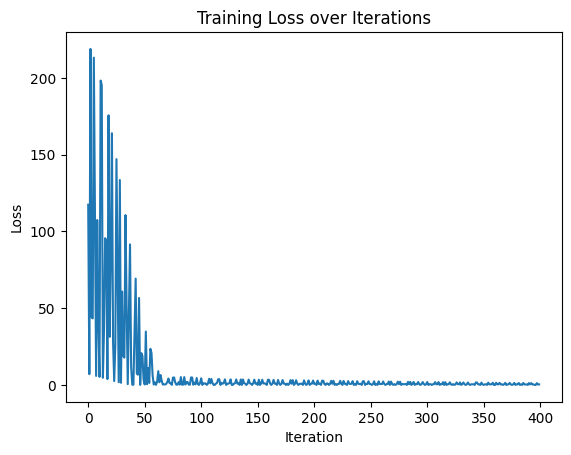

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt


class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        # self.layer1 = nn.Linear(2, 8)
        # self.activation = nn.ReLU()
        # self.layer2 = nn.Linear(8, 1)
        self.model = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
        
    def forward(self, x):
        # x = self.layer1(x)
        # x = self.activation(x)
        # x = self.layer2(x)
        
        return x
    
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
def loss_func(y_pred, y):
    f = nn.MSELoss()
    loss = f(y_pred, y)
    return loss

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3], [7], [11], [15]]
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X = X.to(device)
Y = Y.to(device)
data = MyDataset(X, Y)
loader = DataLoader(data, batch_size=1, shuffle=True)
net = MyNet().to(device)
opt = Adam(net.parameters(), lr=1e-2)
losses = []

for epoch in range(100):
    for x, y in loader:
        opt.zero_grad()
        loss = loss_func(net(x), y)
        loss.backward()
        opt.step()
        losses.append(loss.item())
    
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

上述已经定义并训练了一个网络，那么下面进行测试代码的书写

In [23]:
test_x = torch.tensor([[9,10],[11,12]]).float().to(device)
print("预测结果:", net(test_x))


预测结果: tensor([[17.8927],
        [21.3502]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
# 模型的保存
torch.save(net.state_dict(), "mynet.pth")
# 模型的加载
net2 = MyNet().to(device)
net2.load_state_dict(torch.load("mynet.pth"))
print("加载模型预测结果:", net2(test_x))